# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Zulkifli Yasin Hidayatulloh
- **Email:** zulkifli.yasin.h@gmail.com
- **ID Dicoding:** zulfi_hidayat

## Menentukan Pertanyaan Bisnis

- Apakah terdapat korelasi antar parameter meteorologi seperti cuaca hujan (RAIN), suhu (TEMP), tekanan (PRES), Titik embun (DEWP), dan kecepatan angin (WSPM) pada distirk Aotizhongxin dan Changping?
- Apakah terdapat korelasi antara kosentrasi partikulat PM2.5 dengan senyawa SO2, NO2, CO, dan O3 pada distirk Aotizhongxin dan Changping?
- Apakah terdapat korelasi antara kosentrasi partikulat PM10 dengan senyawa SO2, NO2, CO, dan O3 pada distirk Aotizhongxin dan Changping?
- Bagaimana tren kosentrasi PM2.5 dan PM10?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd '/content/drive/MyDrive/data/PRSA_Data_20130301-20170228'

/content/drive/MyDrive/data/PRSA_Data_20130301-20170228


## Data Wrangling

### Gathering Data

In [3]:
AQ_df_Aotizhongxin = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv')
AQ_df_Aotizhongxin

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [4]:
AQ_df_Changping = pd.read_csv('PRSA_Data_Changping_20130301-20170228.csv')
AQ_df_Changping

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


In [5]:
AQ_df = pd.concat([AQ_df_Aotizhongxin, AQ_df_Changping], ignore_index=True)
AQ_df_sorted = AQ_df.sort_values(by=['year', 'month', 'day', 'hour'], ascending=[True, True, True, True], ignore_index=True)
AQ_df_sorted

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
2,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
3,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
4,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70123,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
70124,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin
70125,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping
70126,35064,2017,2,28,23,19.0,31.0,10.0,79.0,600.0,42.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Aotizhongxin


**Insight:**

Dataframe Kualitas Udara pada stasiun Aotizhongxin dan Changping memiliki atribut baris yang identik dengan jumlah 35064 baris data serta kolom yang identik yang terdiri dari kolom tahun, bulan, hari, jam, PM2.5, PM10, SO2, NO2, CO, O3, Temperatur, Pressure, Dewpoint, Rain, Wind Direction, Wind Speed, dan Lokasi Stasiun

### Assessing Data

In [6]:
AQ_df_Aotizhongxin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [7]:
AQ_df_Changping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [8]:
data_null_Aotizhongxin = AQ_df_Aotizhongxin.isnull().sum().sort_values(ascending=True).reset_index()
data_null_Aotizhongxin = data_null_Aotizhongxin.rename(columns={'index': 'kolom',0: 'jumlah null'})
data_null_Aotizhongxin['persentase'] = (data_null_Aotizhongxin['jumlah null']/AQ_df_Aotizhongxin.shape[0]*100).map('{:.2f}%'.format)
data_null_Aotizhongxin = data_null_Aotizhongxin[data_null_Aotizhongxin['jumlah null'] != 0]
data_null_Aotizhongxin

,kolom,jumlah null,persentase
6,WSPM,14,0.04%
7,TEMP,20,0.06%
8,PRES,20,0.06%
9,DEWP,20,0.06%
10,RAIN,20,0.06%
11,wd,81,0.23%
12,PM10,718,2.05%
13,PM2.5,925,2.64%
14,SO2,935,2.67%
15,NO2,1023,2.92%


In [9]:
data_null_Changping = AQ_df_Changping.isnull().sum().sort_values(ascending=True).reset_index()
data_null_Changping = data_null_Changping.rename(columns={'index': 'kolom',0: 'jumlah null'})
data_null_Changping['persentase'] = (data_null_Changping['jumlah null']/AQ_df_Changping.shape[0]*100).map('{:.2f}%'.format)
data_null_Changping = data_null_Changping[data_null_Changping['jumlah null'] != 0]
data_null_Changping

,kolom,jumlah null,persentase
6,WSPM,43,0.12%
7,PRES,50,0.14%
8,RAIN,51,0.15%
9,TEMP,53,0.15%
10,DEWP,53,0.15%
11,wd,140,0.40%
12,PM10,582,1.66%
13,O3,604,1.72%
14,SO2,628,1.79%
15,NO2,667,1.90%


In [10]:
AQ_df_Aotizhongxin.duplicated().sum()

0

In [11]:
AQ_df_Changping.duplicated().sum()

0

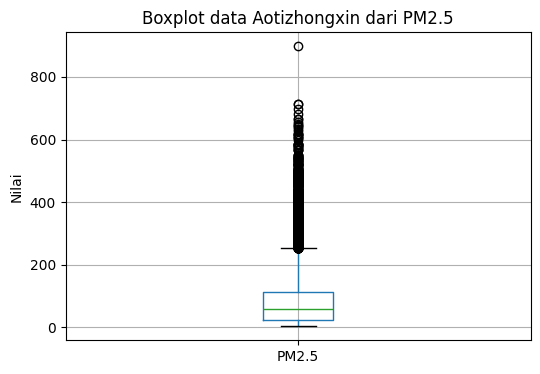

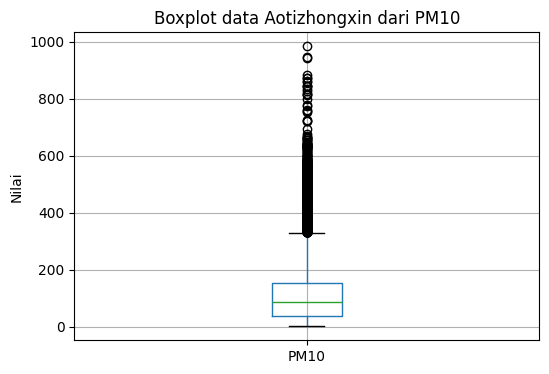

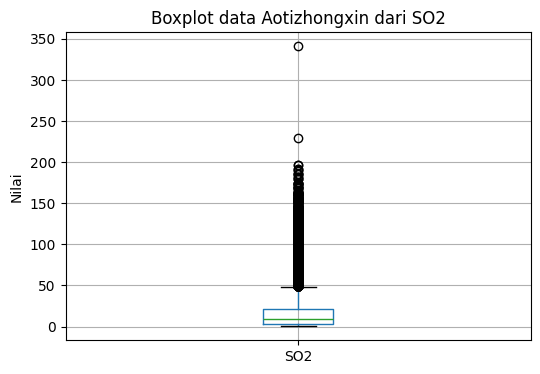

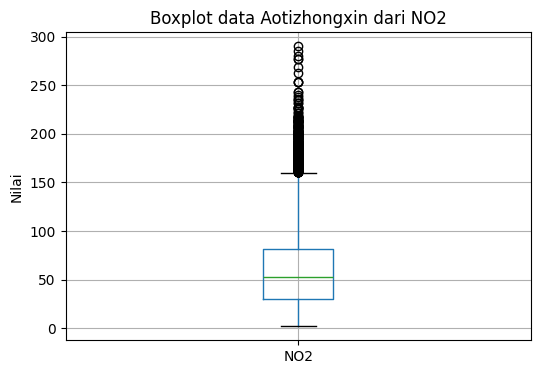

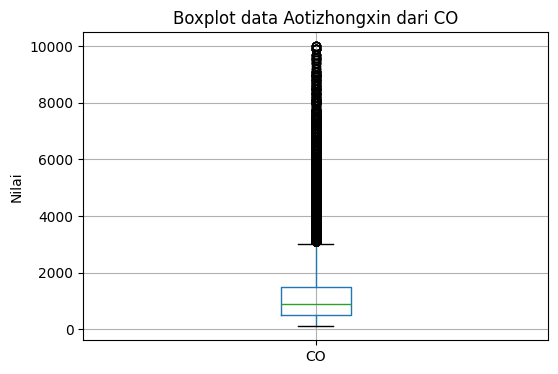

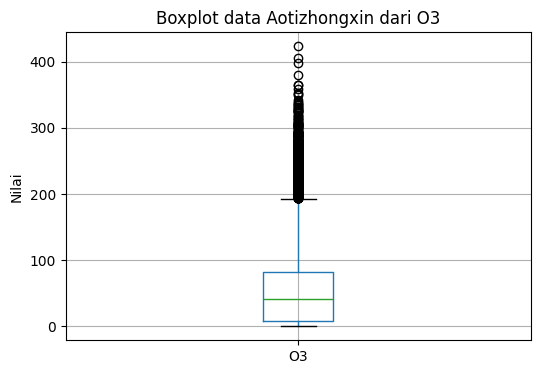

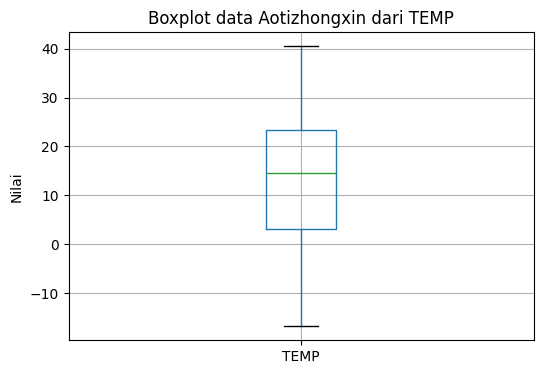

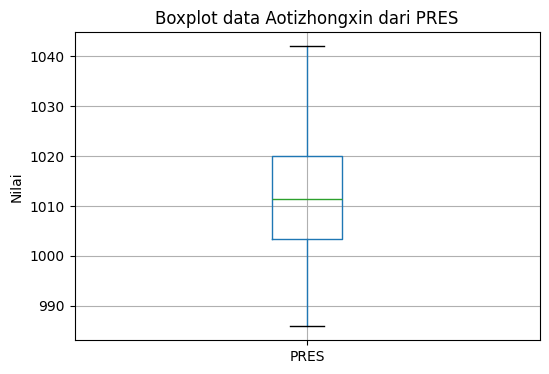

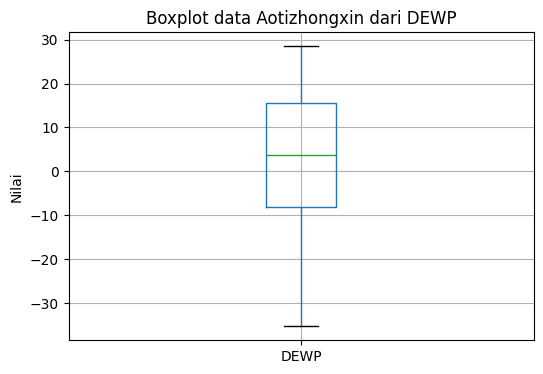

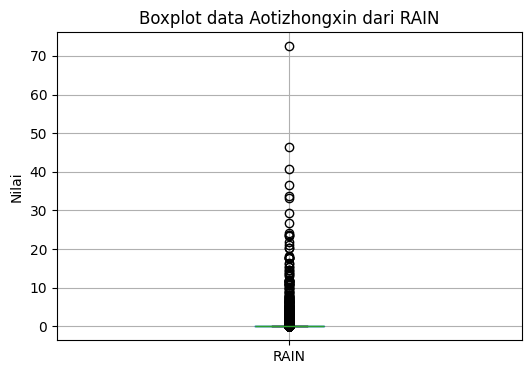

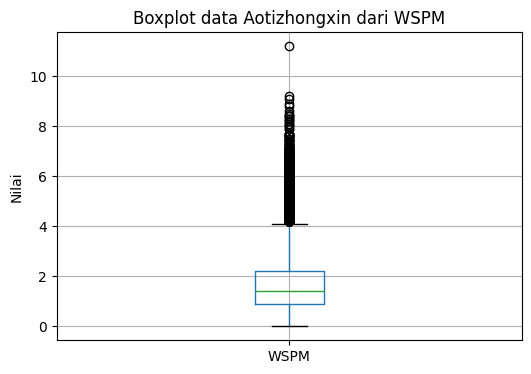

In [12]:
number_of_cols = AQ_df_Aotizhongxin.select_dtypes(include=['number']).columns[AQ_df_Aotizhongxin.columns.get_loc('hour')  + 1:]
for col in number_of_cols:
    plt.figure(figsize=(6, 4))
    AQ_df_Aotizhongxin.boxplot(column=[col])
    plt.title(f'Boxplot data Aotizhongxin dari {col}')
    plt.ylabel('Nilai')
    plt.show()

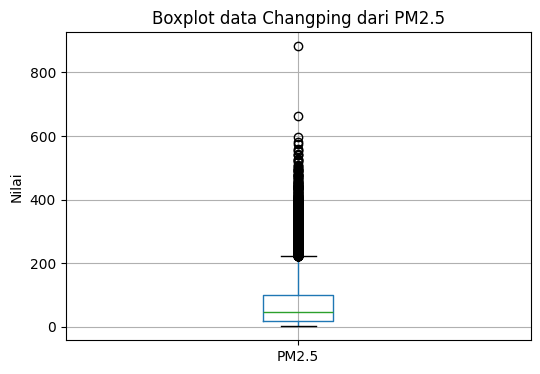

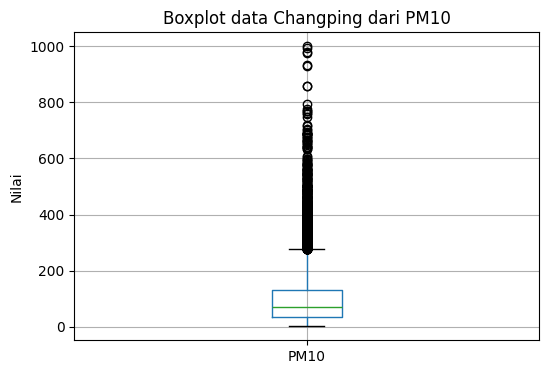

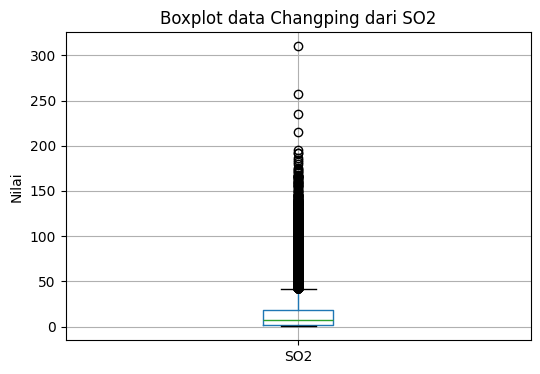

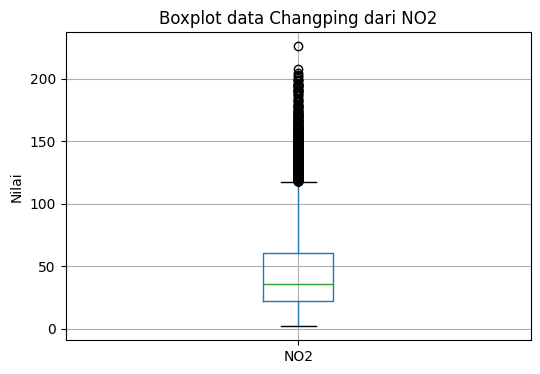

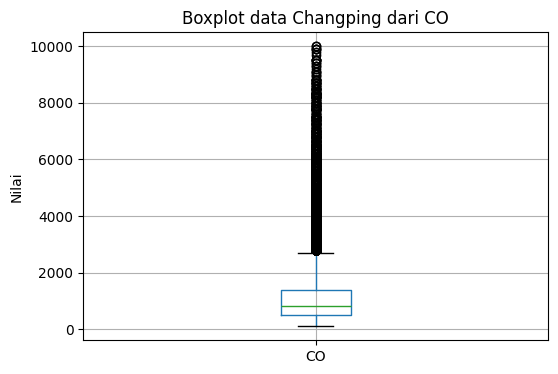

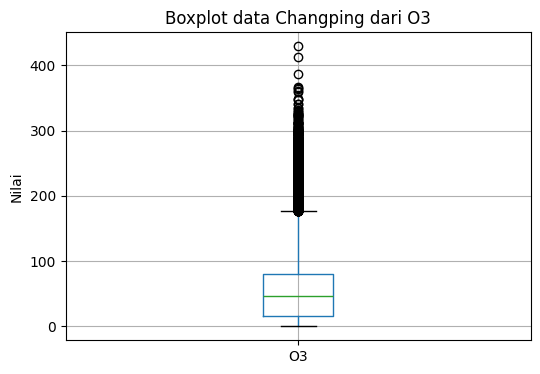

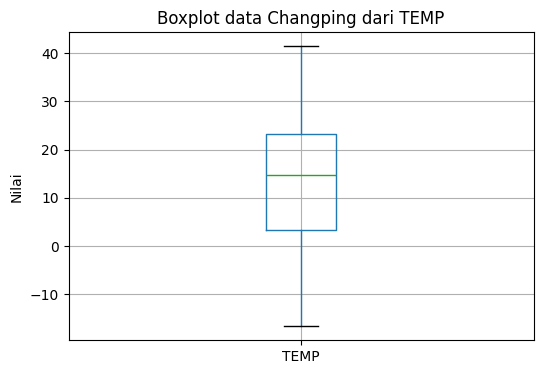

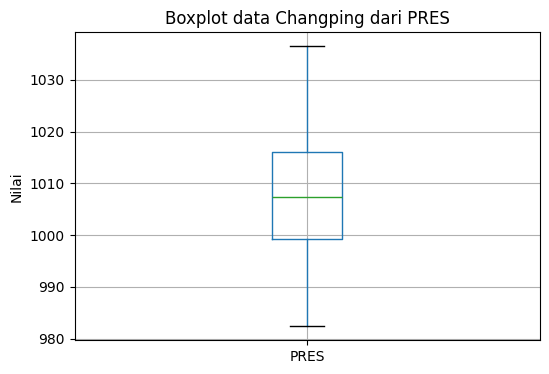

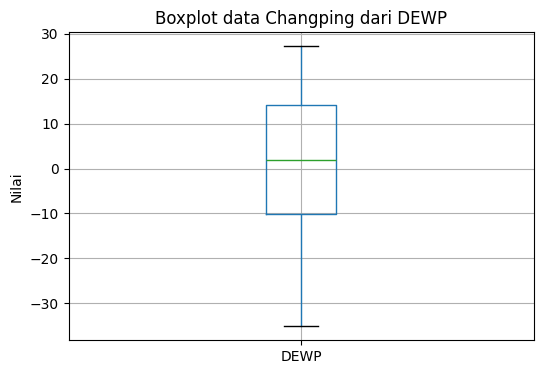

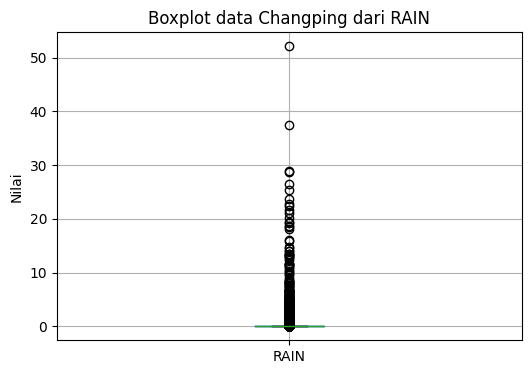

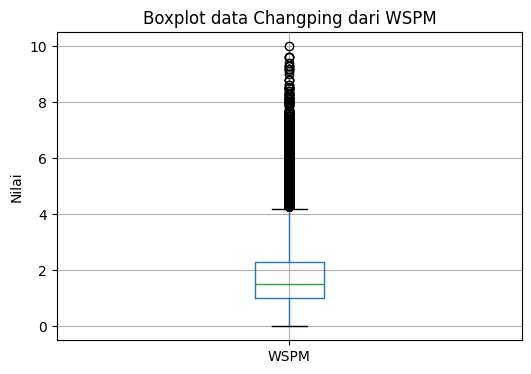

In [13]:
number_of_cols = AQ_df_Changping.select_dtypes(include=['number']).columns[AQ_df_Changping.columns.get_loc('hour')  + 1:]
for col in number_of_cols:
    plt.figure(figsize=(6, 4))
    AQ_df_Changping.boxplot(column=[col])
    plt.title(f'Boxplot data Changping dari {col}')
    plt.ylabel('Nilai')
    plt.show()

**Insight:**
- Tipe data yang terdapat pada dataframe adalah int float dan object
Dari hasil assessing dataframe Kualitas Udara Aotizhongxin diperoleh beberapa kolom yang memiliki nilai yang hilang/missing value dengan kolom yang memiliki jumlah null paling sedikit adalah wind speed (WSPM) dengan jumlah nilai null 14 dan yang terbanyak adalah kolom karbon monoksida (CO) dengan nilai null 1776.

- Sementara itu, pada dataframe Kualitas Udara Changping dari hasil assessing diperoleh diperoleh beberapa kolom yang memiliki nilai yang hilang/missing value dengan kolom yang memiliki jumlah null paling sedikit adalah wind speed (WSPM) dengan jumlah nilai null 43 dan yang terbanyak adalah kolom karbon monoksida (CO) dengan nilai null 1521.

- Dari assessing duplikasi data, tidak terdapat duplikasi data yang ditemukan pada dataframe Kualitas Udara Aotizhongxin dan Changping

- Berdasarkan hasil Boxplot kolom PM2.5, PM10, SO2, NO2, CO, O3, Rain, dan WSPM terdapat banyak outlier di atas kuartil ketiga, terlihat dari titik-titik hitam yang tersebar jauh di atas whisker. Ini menunjukkan bahwa ada beberapa nilai pada kolom tersebut yang tidak umum dibandingkan dengan sebagian besar data

### Cleaning Data

In [14]:
def interpolate_dataframe(df):
  original_col_order = df.columns
  cols_to_interpolate = [col for col in df.columns if col not in ['No', 'year', 'month', 'day', 'hour', 'wd', 'station']]
  cols_to_interpolate_object = [col for col in df.columns if df[col].dtype == 'object']
  for col in cols_to_interpolate:
    df[col] = df[col].interpolate(method='polynomial', order=2)
  df[cols_to_interpolate_object] = df[cols_to_interpolate_object].ffill()
  df = df[original_col_order]
  return df

AQ_df_Aotizhongxin_interpolated = interpolate_dataframe(AQ_df_Aotizhongxin.copy())
AQ_df_Aotizhongxin_interpolated

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [15]:
AQ_df_Changping_interpolated = interpolate_dataframe(AQ_df_Changping.copy())
AQ_df_Changping_interpolated

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.000000,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.000000,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.000000,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.000000,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.000000,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,22.461727,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.000000,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.000000,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.000000,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


In [16]:
data_null_Aotizhongxin = AQ_df_Aotizhongxin_interpolated.isnull().sum().sort_values(ascending=True).reset_index()
data_null_Aotizhongxin = data_null_Aotizhongxin.rename(columns={'index': 'kolom',0: 'jumlah null'})
data_null_Aotizhongxin['persentase'] = (data_null_Aotizhongxin['jumlah null']/AQ_df_Aotizhongxin_interpolated.shape[0]*100).map('{:.2f}%'.format)
data_null_Aotizhongxin

,kolom,jumlah null,persentase
0,No,0,0.00%
1,wd,0,0.00%
2,RAIN,0,0.00%
3,DEWP,0,0.00%
4,PRES,0,0.00%
5,TEMP,0,0.00%
6,O3,0,0.00%
7,CO,0,0.00%
8,NO2,0,0.00%
9,SO2,0,0.00%


In [17]:
data_null_Changping = AQ_df_Changping_interpolated.isnull().sum().sort_values(ascending=True).reset_index()
data_null_Changping = data_null_Changping.rename(columns={'index': 'kolom',0: 'jumlah null'})
data_null_Changping['persentase'] = (data_null_Changping['jumlah null']/AQ_df_Changping_interpolated.shape[0]*100).map('{:.2f}%'.format)
data_null_Changping

,kolom,jumlah null,persentase
0,No,0,0.00%
1,wd,0,0.00%
2,RAIN,0,0.00%
3,DEWP,0,0.00%
4,PRES,0,0.00%
5,TEMP,0,0.00%
6,O3,0,0.00%
7,CO,0,0.00%
8,NO2,0,0.00%
9,SO2,0,0.00%


In [18]:
def impute_iqr(df):
  for col in df.columns:
    if col not in ['No', 'year', 'month', 'day', 'hour', 'wd', 'station', 'RAIN']:
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      df[col] = df[col].mask((df[col] < lower_bound) | (df[col] > upper_bound), np.nan)
      df[col] = df[col].fillna(df[col].median())
  return df

AQ_df_Aotizhongxin_impute = impute_iqr(AQ_df_Aotizhongxin_interpolated.copy())
AQ_df_Aotizhongxin_impute

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,1.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,1.4,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,1.4,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [19]:
AQ_df_Changping_impute = impute_iqr(AQ_df_Changping_interpolated.copy())
AQ_df_Changping_impute

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.000000,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.000000,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.000000,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.000000,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.000000,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,22.461727,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.000000,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.000000,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.000000,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


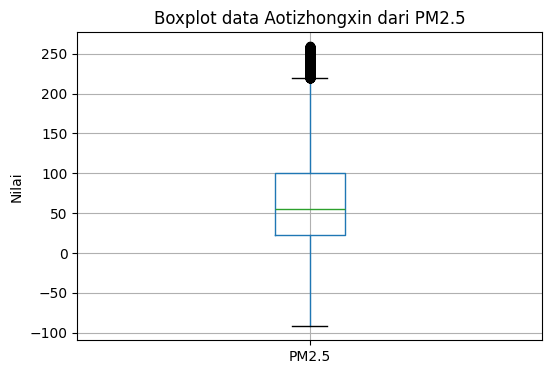

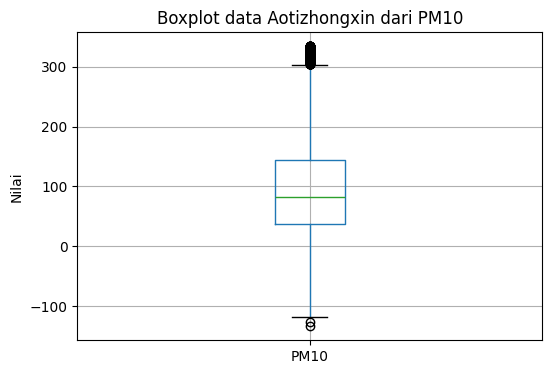

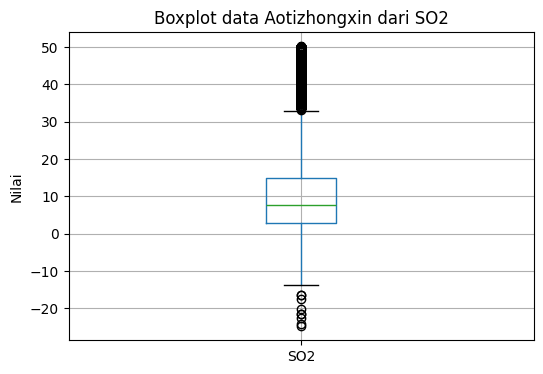

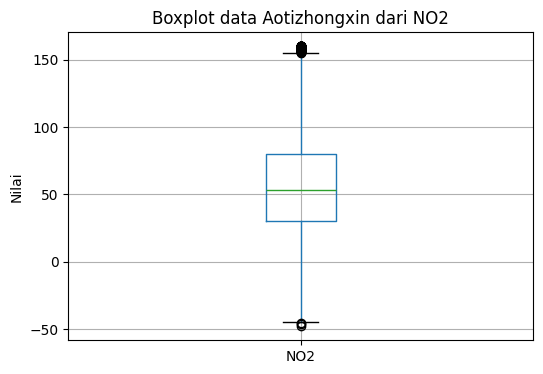

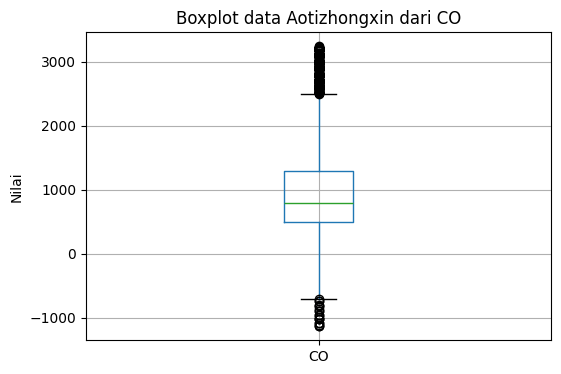

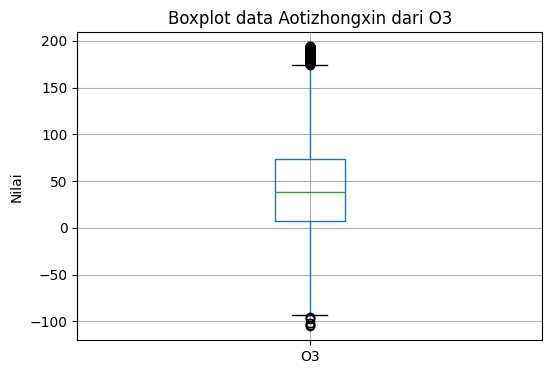

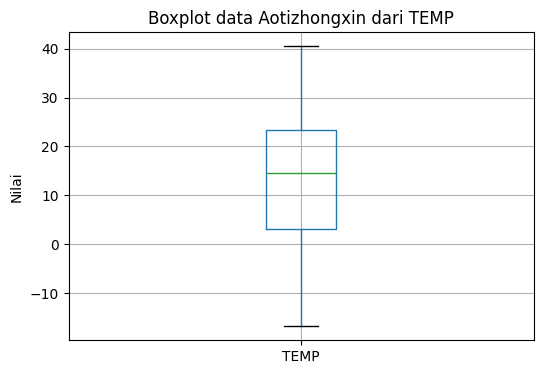

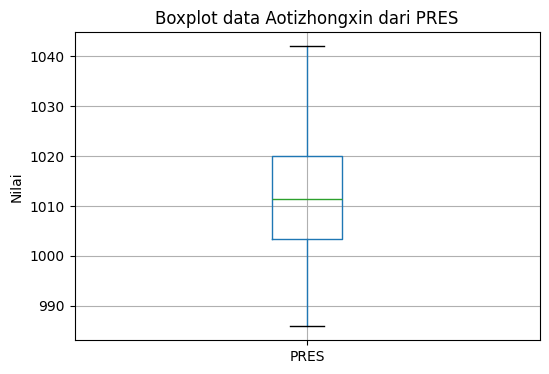

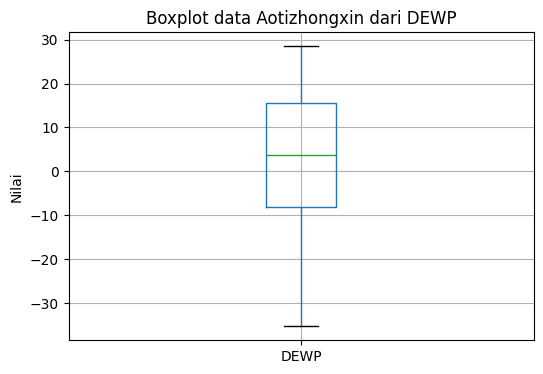

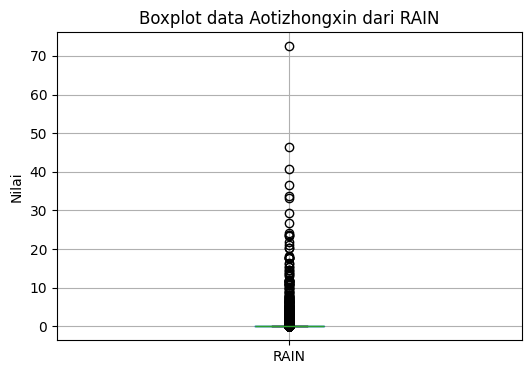

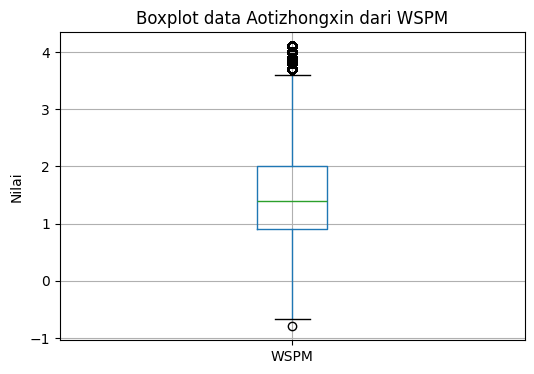

In [20]:
number_of_cols = AQ_df_Aotizhongxin_impute.select_dtypes(include=['number']).columns[AQ_df_Aotizhongxin_impute.columns.get_loc('hour')  + 1:]
for col in number_of_cols:
    plt.figure(figsize=(6, 4))
    AQ_df_Aotizhongxin_impute.boxplot(column=[col])
    plt.title(f'Boxplot data Aotizhongxin dari {col}')
    plt.ylabel('Nilai')
    plt.show()

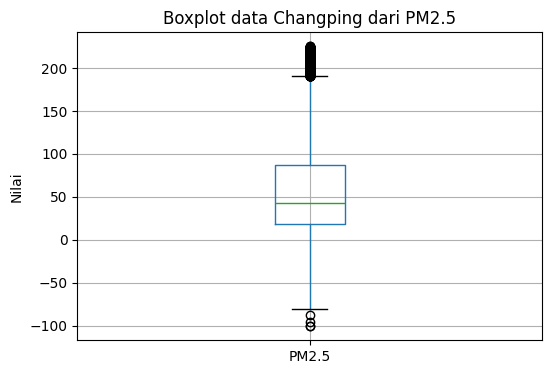

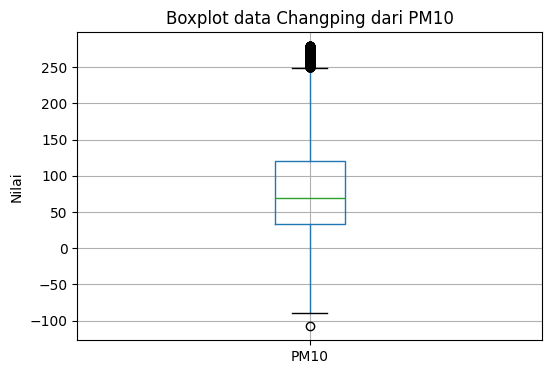

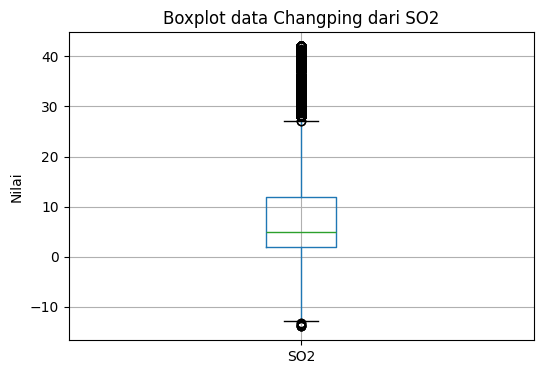

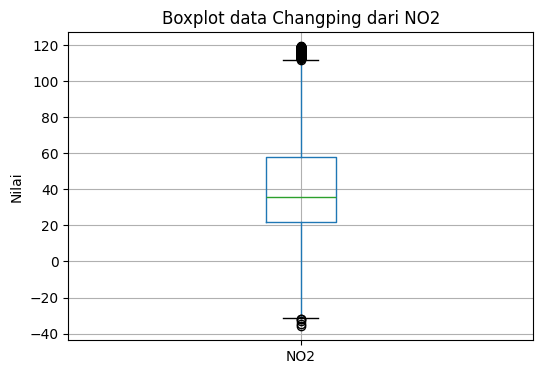

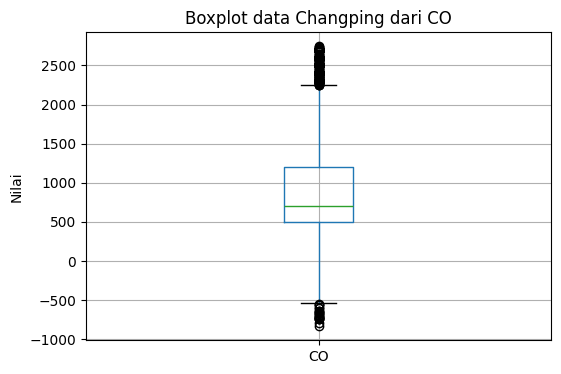

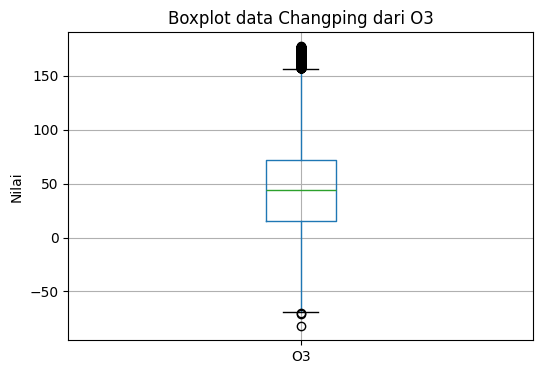

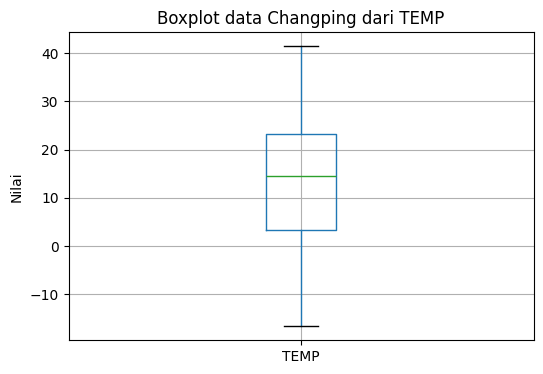

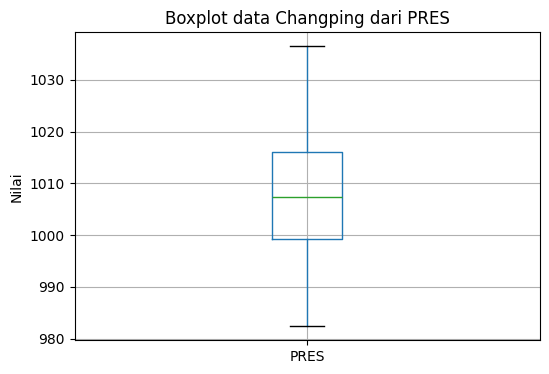

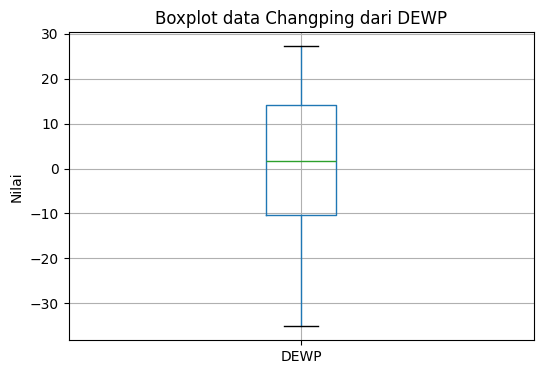

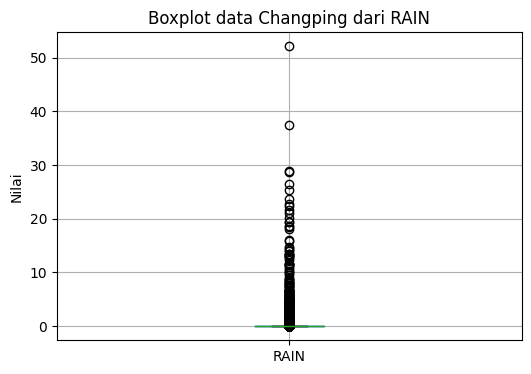

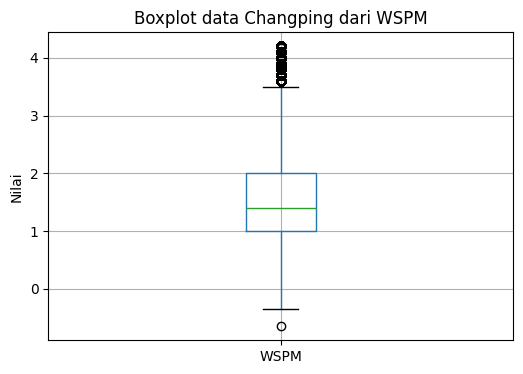

In [21]:
number_of_cols = AQ_df_Changping_impute.select_dtypes(include=['number']).columns[AQ_df_Changping_impute.columns.get_loc('hour')  + 1:]
for col in number_of_cols:
    plt.figure(figsize=(6, 4))
    AQ_df_Changping_impute.boxplot(column=[col])
    plt.title(f'Boxplot data Changping dari {col}')
    plt.ylabel('Nilai')
    plt.show()

In [22]:
AQ_df_Aotizhongxin_impute.to_csv('df_Aotizhongxin_AQ.csv', index=False)
AQ_df_Changping_impute.to_csv('df_Changping_AQ.csv', index=False)

**Insight:**
- Hasil dari interpolasi data untuk melakukan penanganan pada sebuah data null atau adanya missing value pada data diperoleh hasil bahwa tidak terdapat data null pada masing-masing data frame
- Proses imputasi diimplementasikan pada semua kolom yang memiliki atribut data numerik (int dan float) kecuali pada kolom RAIN (curah hujan) karena apabila dilakukan imputasi akan terdapat informasi data berharga yang hilang seperti hujan lebat, sangat lebat dan ekstrem yang nilai curah hujannya diatas 50 mm/hari

## Exploratory Data Analysis (EDA)

### Explore ...

In [23]:
exclude_columns = ['No', 'year', 'month', 'day', 'hour', 'station']
include_columns = [col for col in AQ_df_Aotizhongxin_impute.columns if col not in exclude_columns]
describe_df_Aotizhongxin = AQ_df_Aotizhongxin_impute[include_columns].describe()
print(describe_df_Aotizhongxin)

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      70.500221     99.626859     11.486229     57.646346    990.390804   
std       59.000254     74.911933     11.043119     34.241606    682.532113   
min      -91.899740   -133.433750    -24.761431    -47.949377  -1131.338528   
25%       22.000000     38.000000      3.000000     30.000000    500.000000   
50%       55.000000     83.000000      7.711200     53.000000    800.000000   
75%      101.000000    144.000000     15.000000     80.000000   1300.000000   
max      259.391527    334.000000     50.209430    160.000000   3243.974177   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  35064.000000  35064.000000  35064.000000  35064.000000  3.506400e+04   
mean      47.926214     13.581217   1011.851689      3.120639  6.741805e-02   
std       46.232232     11.400658     10.404582    

In [24]:
exclude_columns = ['No', 'year', 'month', 'day', 'hour', 'station']
include_columns = [col for col in AQ_df_Changping_impute.columns if col not in exclude_columns]
describe_df_Changping = AQ_df_Changping_impute[include_columns].describe()
print(describe_df_Changping)

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      59.591454     84.140323      9.078228     41.962467    887.917968   
std       52.052365     62.647334      9.377043     26.037262    574.662194   
min     -100.830933   -107.726337    -13.884479    -35.966437   -834.380424   
25%       18.000000     34.000000      2.000000     22.000000    500.000000   
50%       43.000000     69.000000      5.000000     36.000000    700.000000   
75%       87.000000    120.000000     12.000000     58.000000   1200.000000   
max      225.466547    279.000000     42.000000    119.444416   2744.542351   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      49.654360     13.671814   1007.771228      1.487389      0.060619   
std       39.988481     11.367121     10.226106    

**Insight:**
- Deskripsi data menunjukkan bahwa kualitas udara di distrik Aotizhongxin yang dianalisis menghadapi tingkat polusi yang cukup tinggi, terutama pada parameter PM2.5, PM10, NO2, dan CO. Nilai-nilai ekstrem dari beberapa parameter (seperti CO dan PM10) menandakan terdapat masalah yang serius terhadap tingkat polutan yang mempengaruhi kualitas udara, yang mungkin terkait dengan aktivitas industri atau kondisi cuaca tertentu. Selain itu, ada variasi yang cukup besar pada beberapa parameter meteorologi/cuaca, seperti suhu dan tekanan, yang bisa mempengaruhi kondisi polusi udara di wilayah Aotizhongxin
- Deskripsi data pada distrik Changping  menunjukkan bahwa polusi udara, terutama PM2.5, PM10, NO2, dan CO, merupakan masalah signifikan di wilayah ini. Meskipun rata-rata beberapa polutan tetap dalam ambang batas yang rendah, terdapat data yang menunjukan di mana konsentrasinya meningkat tajam.
- Data pada distrik Chhangping menunjukkan tingkat kualitas udara yang lebih baik dalam beberapa aspek, terutama pada PM2.5, PM10, SO2, NO2, dan CO. Namun, O3 memiliki tingkat yang sedikit lebih tinggi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

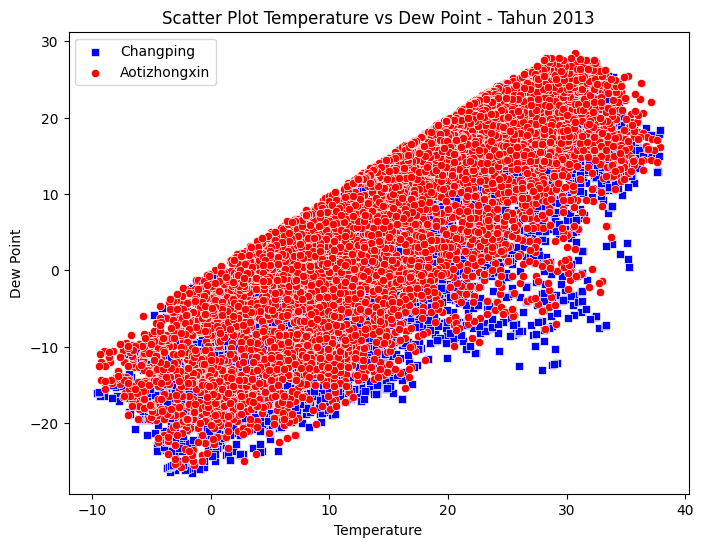

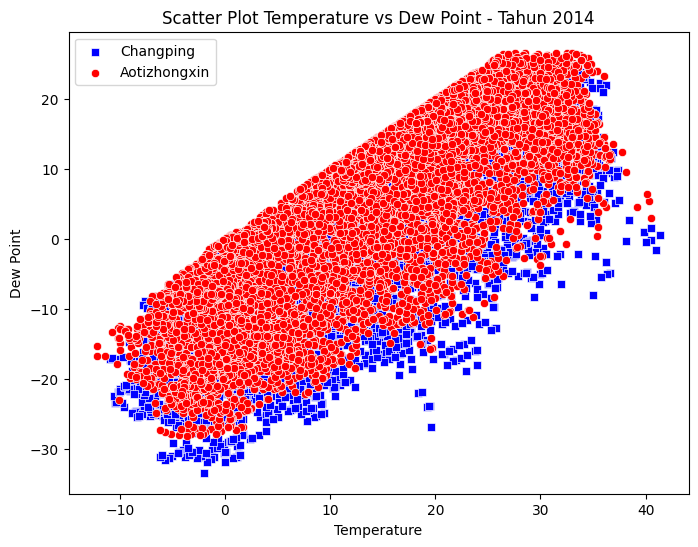

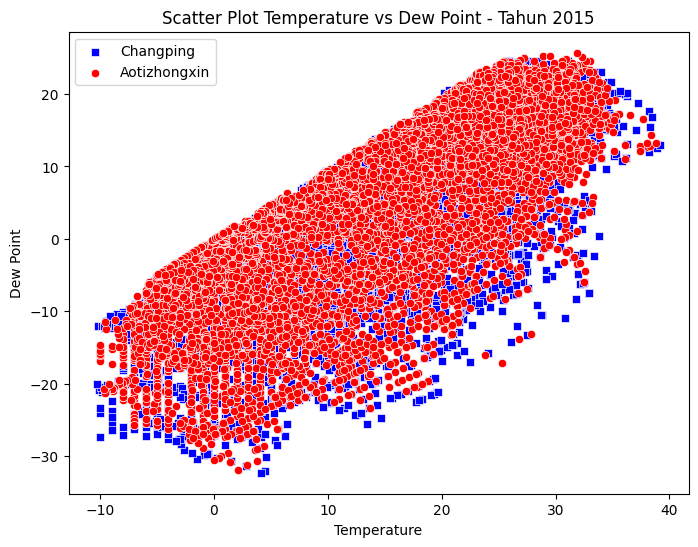

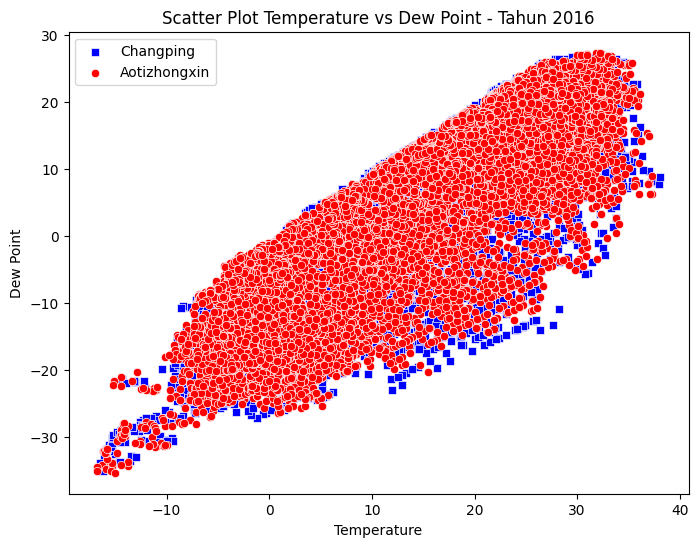

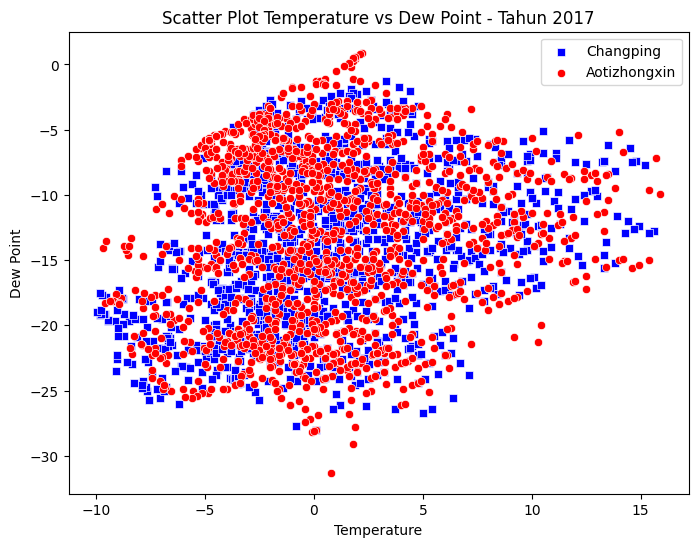

In [25]:
unique_years = AQ_df_Changping_impute['year'].unique()
for year in unique_years:
    changping_year_data = AQ_df_Changping_impute[AQ_df_Changping_impute['year'] == year]
    aotizhongxin_year_data = AQ_df_Aotizhongxin_impute[AQ_df_Aotizhongxin_impute['year'] == year]

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=changping_year_data['TEMP'], y=changping_year_data['DEWP'], color='blue', label='Changping', marker='s')
    sns.scatterplot(x=aotizhongxin_year_data['TEMP'], y=aotizhongxin_year_data['DEWP'], color='red', label='Aotizhongxin', marker='o')

    plt.xlabel('Temperature')
    plt.ylabel('Dew Point')
    plt.title(f'Scatter Plot Temperature vs Dew Point - Tahun {year}')
    plt.legend()

    plt.show()

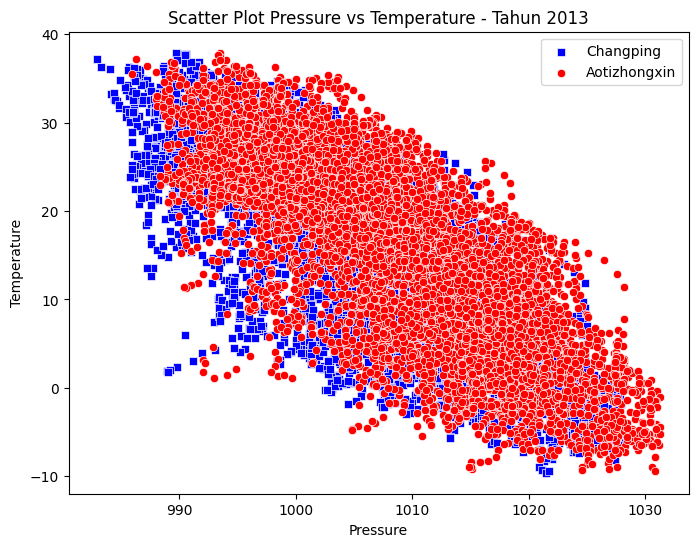

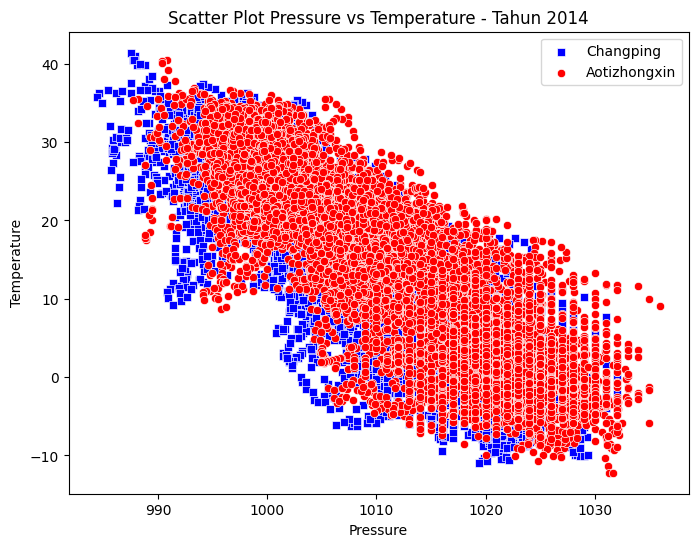

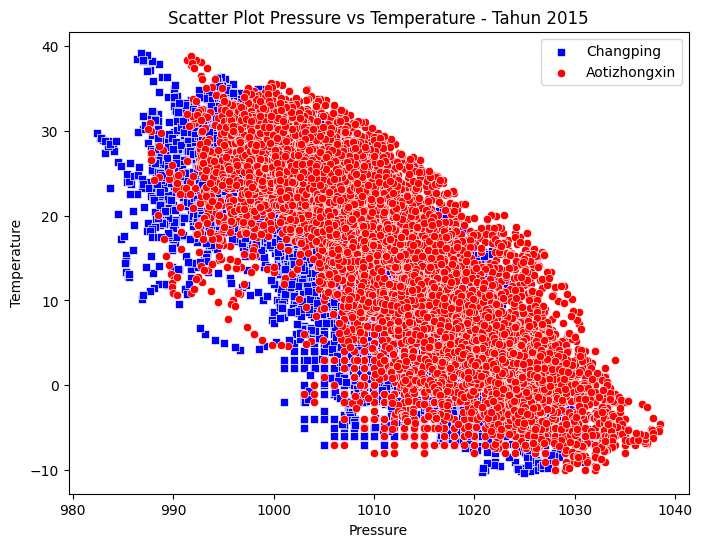

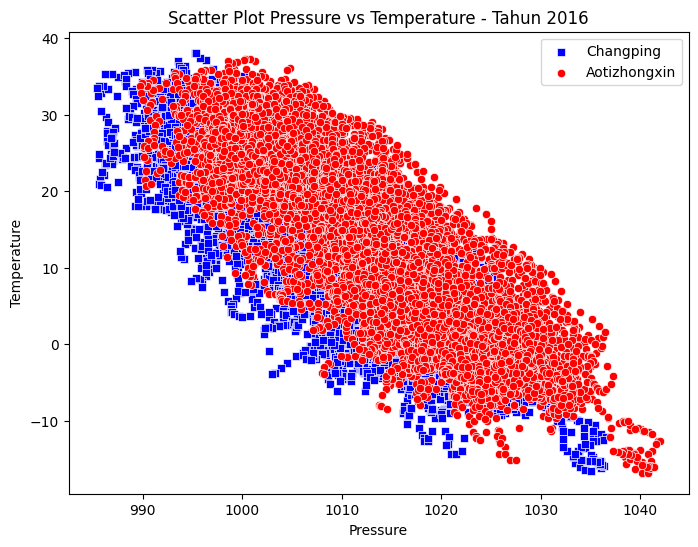

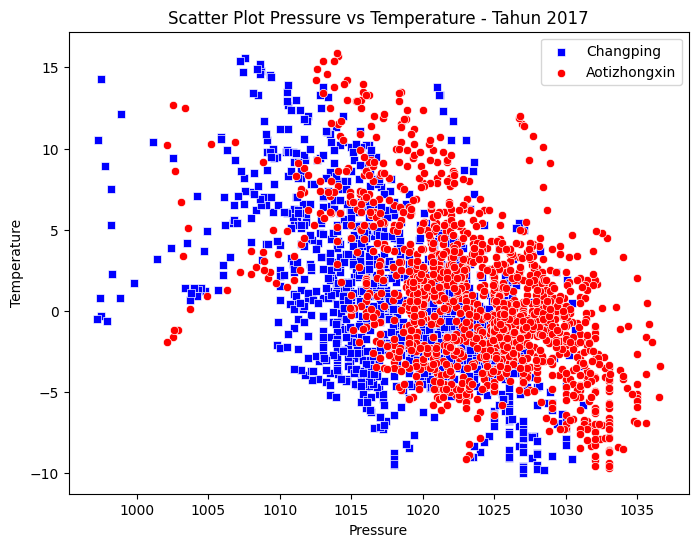

In [26]:
unique_years = AQ_df_Changping_impute['year'].unique()
for year in unique_years:
    changping_year_data = AQ_df_Changping_impute[AQ_df_Changping_impute['year'] == year]
    aotizhongxin_year_data = AQ_df_Aotizhongxin_impute[AQ_df_Aotizhongxin_impute['year'] == year]

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=changping_year_data.PRES, y=changping_year_data.TEMP, color='blue', label='Changping', marker='s')
    sns.scatterplot(x=aotizhongxin_year_data.PRES, y=aotizhongxin_year_data.TEMP, color='red', label='Aotizhongxin', marker='o')

    plt.xlabel('Pressure')
    plt.ylabel('Temperature')
    plt.title(f'Scatter Plot Pressure vs Temperature - Tahun {year}')
    plt.legend()

    plt.show()

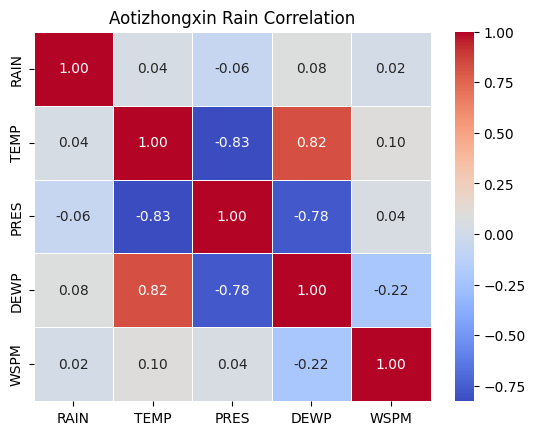

In [27]:
rain_corr = AQ_df_Aotizhongxin_impute[['RAIN','TEMP', 'PRES', 'DEWP', 'WSPM']].corr()
rain_corr_vis_Aot = sns.heatmap(rain_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
rain_corr_vis_Aot.set_title('Aotizhongxin Rain Correlation')
plt.show()

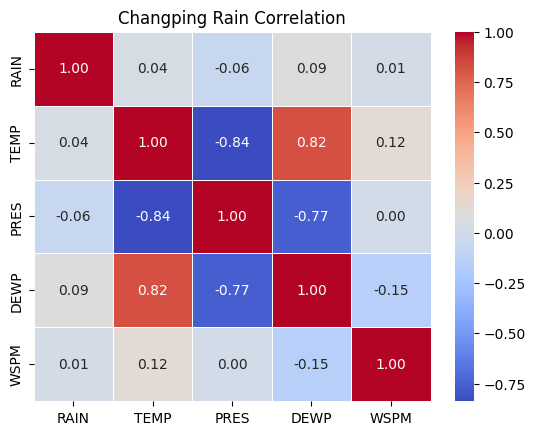

In [28]:
rain_corr = AQ_df_Changping_impute[['RAIN','TEMP', 'PRES', 'DEWP', 'WSPM']].corr()
rain_corr_vis_Chang = sns.heatmap(rain_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
rain_corr_vis_Chang.set_title('Changping Rain Correlation')
plt.show()

### Pertanyaan 2:

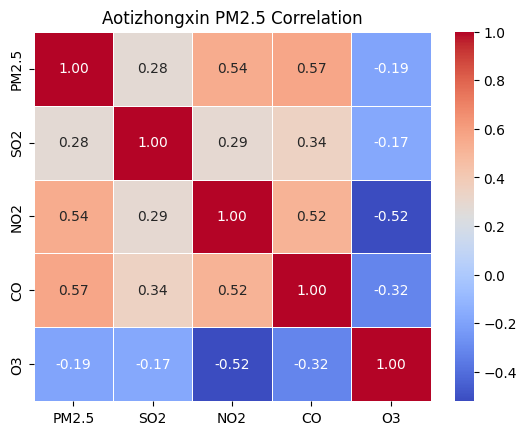

In [29]:
air_quality_corr = AQ_df_Aotizhongxin_impute[['PM2.5', 'SO2', 'NO2', 'CO', 'O3']].corr()
aq_Aot_vis_Aot = sns.heatmap(air_quality_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
aq_Aot_vis_Aot.set_title('Aotizhongxin PM2.5 Correlation')
plt.show()

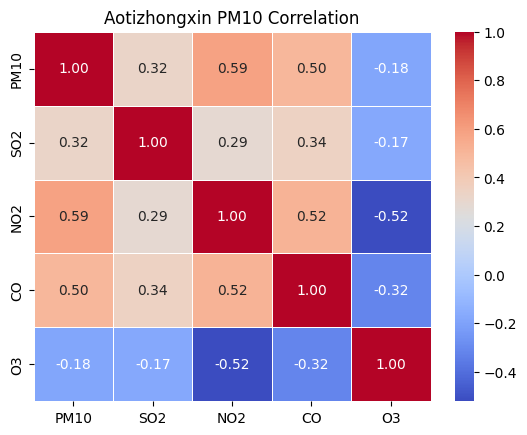

In [30]:
air_quality_corr = AQ_df_Aotizhongxin_impute[['PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()
aq_Aot_vis_Aot = sns.heatmap(air_quality_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
aq_Aot_vis_Aot.set_title('Aotizhongxin PM10 Correlation')
plt.show()

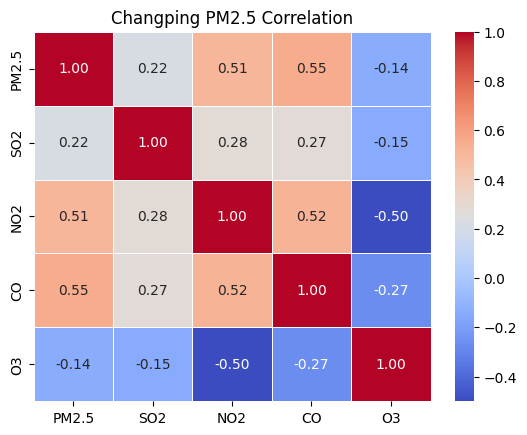

In [31]:
air_quality_corr = AQ_df_Changping_impute[['PM2.5', 'SO2', 'NO2', 'CO', 'O3']].corr()
aq_Aot_vis_chang = sns.heatmap(air_quality_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
aq_Aot_vis_chang.set_title('Changping PM2.5 Correlation')
plt.show()

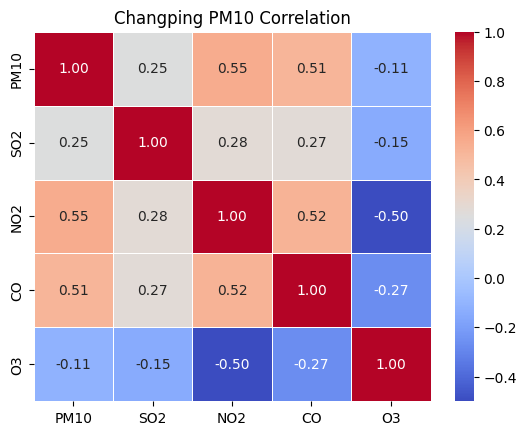

In [32]:
air_quality_corr = AQ_df_Changping_impute[['PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()
aq_Aot_vis_chang = sns.heatmap(air_quality_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
aq_Aot_vis_chang.set_title('Changping PM10 Correlation')
plt.show()

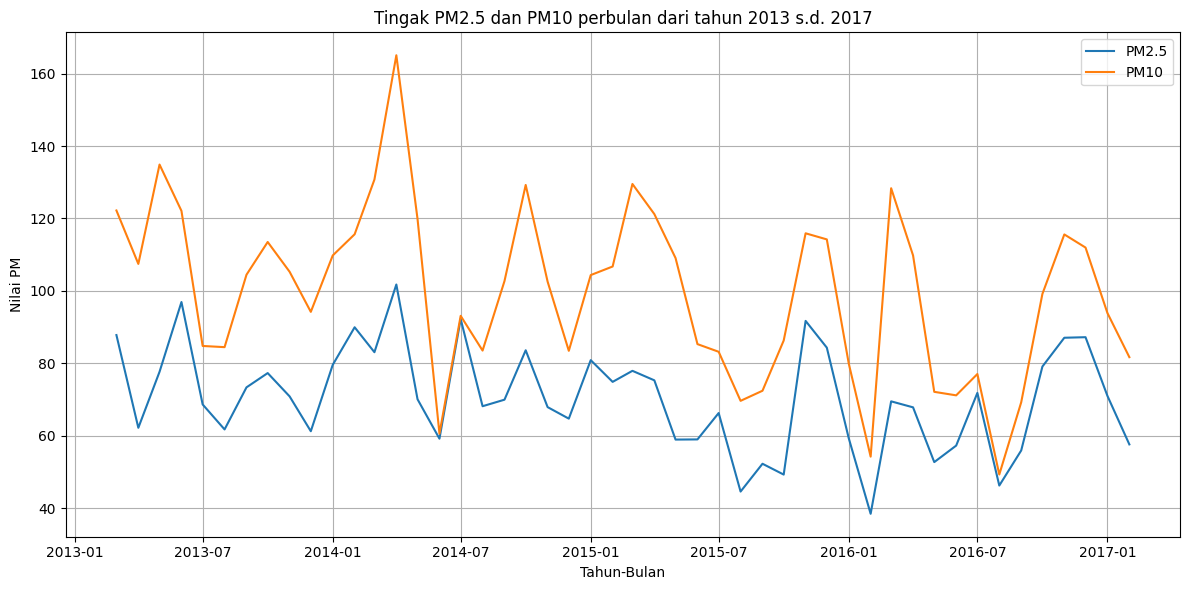

In [33]:
pm_data = AQ_df_Aotizhongxin_impute.groupby(['year', 'month'])[['PM2.5', 'PM10']].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(pm_data['year'].astype(str) + '-' + pm_data['month'].astype(str), format='%Y-%m'), pm_data['PM2.5'], label='PM2.5')
plt.plot(pd.to_datetime(pm_data['year'].astype(str) + '-' + pm_data['month'].astype(str), format='%Y-%m'), pm_data['PM10'], label='PM10')

plt.xlabel('Tahun-Bulan')
plt.ylabel('Nilai PM')
plt.title('Tingak PM2.5 dan PM10 perbulan dari tahun 2013 s.d. 2017')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight:**
- Terdapat korelasi antara nilai suhu / temperature, titik embun / dew point, dan tekanan / pressure, nilai suhu memiliki korelasi positif terhadap titik embun, sedangkat nilai suhu memiliki korelasi negatif terhadap tekanan, dan tekanan memiliki nilai korelasi positif terhadap titik embun
- Terdapat korelasi positif antara PM2.5 dengan gas polutan CO dan NO2 yang menandakan bahwa kosentrasi partikulat PM2.5 banyak terdapat gas polutan CO dan NO2, sedangkan PM2.5 memiliki korelasi rendah dengan gas polutan SO2
- Hal yang sama ditunjuan kosentrasi partikulat PM10 yang memiliki korelasi dengan gas polutan CO dan NO2 dan memiliki korelasi rendah dengan gas polutan SO2
- Tren tingkat kosentrasi partikulat PM2.5 dan PM10 menunjukan bahwa nilai kosentrasi partikulat PM10 memiliki nilai yang lebih tinggi dibandingkan dengan kosentrasi partikulat PM2.5, pada grafik dapat dianalisis bahwa nilai tertinggi kosentrasi partikulat PM2.5 dan PM10 pada semester pertama tahun 2014 sementara itu tingkat terendah kosentrasi partikulat PM2.5 dan PM10 pada semester pertama tahun 2016

## Analisis Lanjutan (Opsional)

In [34]:
def group_months_by_pm(df, pm_column, threshold):
  monthly_avg_pm = df.groupby(['year', 'month'])[pm_column].mean().reset_index()
  monthly_avg_pm['group'] = 'Normal'
  monthly_avg_pm.loc[monthly_avg_pm[pm_column] > threshold, 'group'] = 'High'
  return monthly_avg_pm

pm25_grouped = group_months_by_pm(AQ_df_Aotizhongxin_impute, 'PM2.5', 50)
pm10_grouped = group_months_by_pm(AQ_df_Aotizhongxin_impute, 'PM10', 100)

print("Periode bulan berdasarkan clustering tingkat kosentrasi PM2.5:")
print(pm25_grouped)

print("\nPeriode bulan berdasarkan clustering tingkat kosentrasi PM10:")
print(pm10_grouped)

Periode bulan berdasarkan clustering tingkat kosentrasi PM2.5:
    year  month       PM2.5   group
0   2013      3   87.795699    High
1   2013      4   62.177778    High
2   2013      5   77.650659    High
3   2013      6   96.921451    High
4   2013      7   68.620968    High
5   2013      8   61.724670    High
6   2013      9   73.346678    High
7   2013     10   77.292990    High
8   2013     11   70.853846    High
9   2013     12   61.227732    High
10  2014      1   79.558396    High
11  2014      2   89.946247    High
12  2014      3   83.056452    High
13  2014      4  101.762491    High
14  2014      5   70.052859    High
15  2014      6   59.167772    High
16  2014      7   92.240548    High
17  2014      8   68.136176    High
18  2014      9   69.940916    High
19  2014     10   83.593004    High
20  2014     11   67.890070    High
21  2014     12   64.702749    High
22  2015      1   80.861505    High
23  2015      2   74.863583    High
24  2015      3   77.913839    High
2

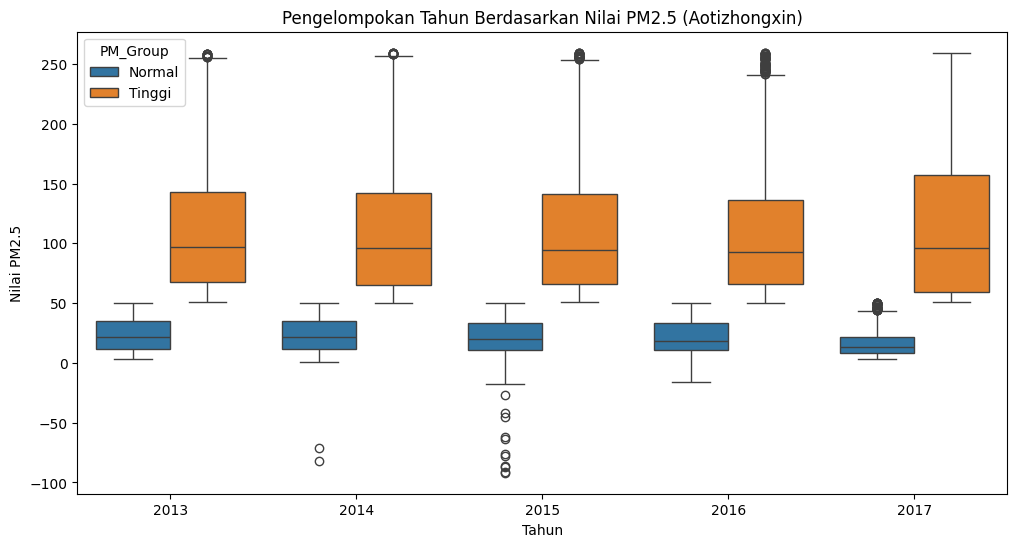

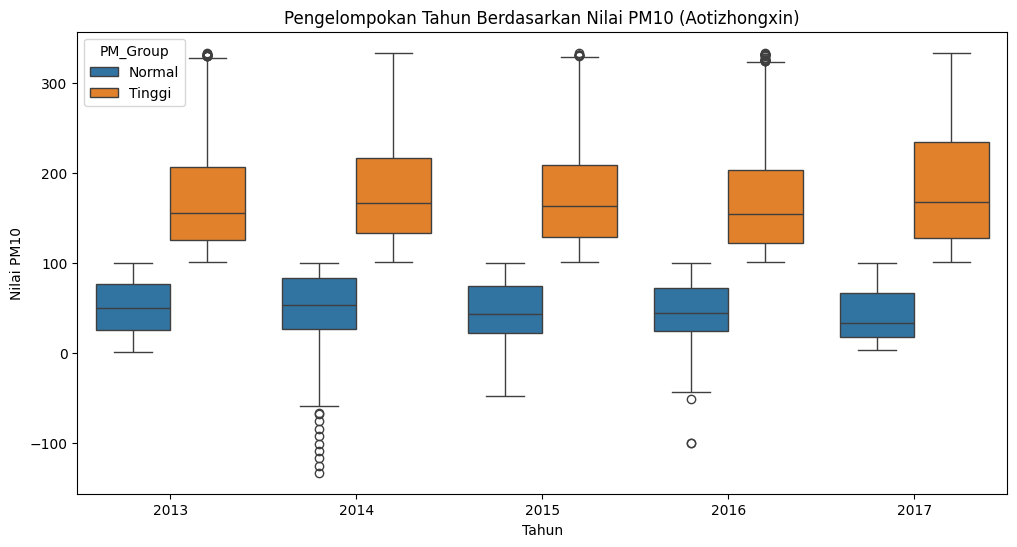

In [35]:
def group_months_by_pm(df, pm_column, threshold):
  df['PM_Group'] = 'Normal'
  df.loc[df[pm_column] > threshold, 'PM_Group'] = 'Tinggi'
  return df

# Mengelompokkan bulan berdasarkan PM2.5 dengan ambang batas tertentu
AQ_df_Aotizhongxin_grouped_pm25 = group_months_by_pm(AQ_df_Aotizhongxin_impute.copy(), 'PM2.5', 50)
AQ_df_Aotizhongxin_grouped_pm10 = group_months_by_pm(AQ_df_Aotizhongxin_impute.copy(), 'PM10', 100)

# Visualisasi hasil pengelompokan per tahun untuk PM2.5
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='PM2.5', hue='PM_Group', data=AQ_df_Aotizhongxin_grouped_pm25)
plt.xlabel('Tahun')
plt.ylabel('Nilai PM2.5')
plt.title('Pengelompokan Tahun Berdasarkan Nilai PM2.5 (Aotizhongxin)')
plt.show()

# Visualisasi hasil pengelompokan per tahun untuk PM10
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='PM10', hue='PM_Group', data=AQ_df_Aotizhongxin_grouped_pm10)
plt.xlabel('Tahun')
plt.ylabel('Nilai PM10')
plt.title('Pengelompokan Tahun Berdasarkan Nilai PM10 (Aotizhongxin)')
plt.show()

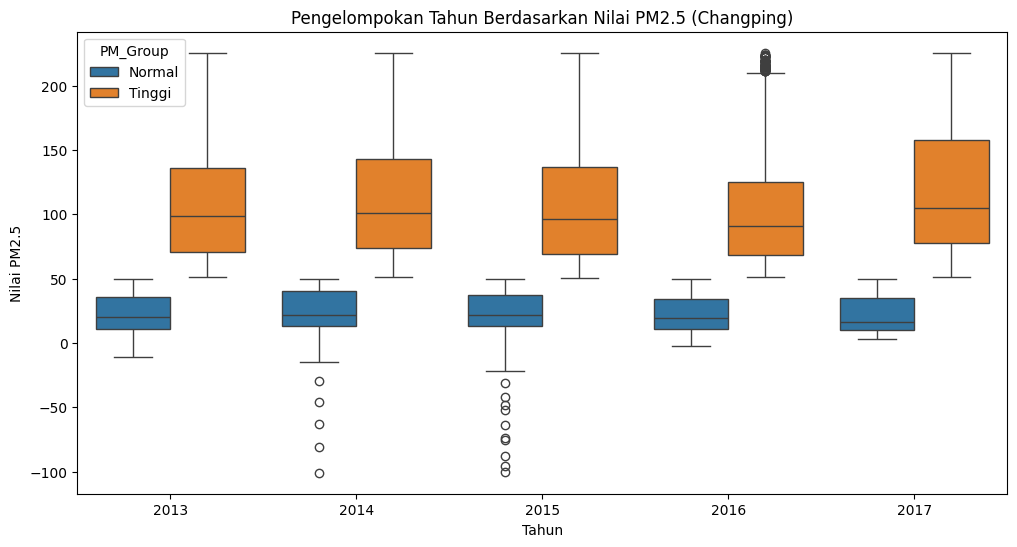

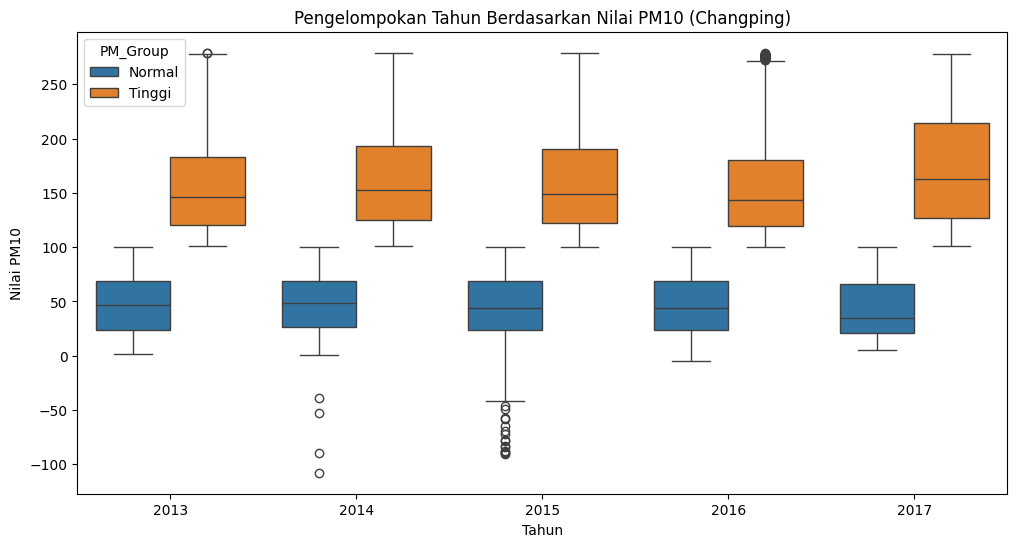

In [36]:
def group_months_by_pm(df, pm_column, threshold):
  df['PM_Group'] = 'Normal'
  df.loc[df[pm_column] > threshold, 'PM_Group'] = 'Tinggi'
  return df

# Mengelompokkan bulan berdasarkan PM2.5 dengan ambang batas tertentu
AQ_df_Changping_grouped_pm25 = group_months_by_pm(AQ_df_Changping_impute.copy(), 'PM2.5', 50)
AQ_df_Changping_grouped_pm10 = group_months_by_pm(AQ_df_Changping_impute.copy(), 'PM10', 100)

# Visualisasi hasil pengelompokan per tahun untuk PM2.5
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='PM2.5', hue='PM_Group', data=AQ_df_Changping_grouped_pm25)
plt.xlabel('Tahun')
plt.ylabel('Nilai PM2.5')
plt.title('Pengelompokan Tahun Berdasarkan Nilai PM2.5 (Changping)')
plt.show()

# Visualisasi hasil pengelompokan per tahun untuk PM10
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='PM10', hue='PM_Group', data=AQ_df_Changping_grouped_pm10)
plt.xlabel('Tahun')
plt.ylabel('Nilai PM10')
plt.title('Pengelompokan Tahun Berdasarkan Nilai PM10 (Changping)')
plt.show()

## Conclusion

Terdapat hubungan yang jelas antara parameter meteorologi (suhu, titik embun, dan tekanan) yang memengaruhi kondisi atmosfer dan bagaimana polusi udara tersebar atau tertahan di udara.
PM2.5 dan PM10 menunjukkan korelasi positif dengan polutan gas CO dan NO2.
gas polutan SO2 cenderung tidak memiliki berkorelasi dengan PM2.5 dan PM10, menunjukkan bahwa polusi SO2.
Tren menunjukkan adanya fluktuasi kualitas udara dari tahun ke tahun, dengan tingkat polusi tertinggi pada 2014 dan terendah pada 2016, yang mungkin mencerminkan dampak kebijakan atau faktor cuaca pada kualitas udara.